In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('concatenated_reviews.csv')

In [3]:
# check for duplicates in id column
df['id'].duplicated().sum()

13

In [4]:
# drop duplicates
df.drop_duplicates(subset='id', inplace=True)

In [5]:
# check for null values in body column
df['body'].isnull().sum()

1

In [6]:
#check for null values in title column
df['title'].isnull().sum()

0

In [7]:
df['title_body'] = df['title'] + ' ' + df['body']

In [8]:
# string
docs = df['title_body'].astype(str)

In [9]:
# merge all documents into one string
all_docs = ' '.join(docs)

# data type all_docs
type(all_docs)

str

Preprocessing with SPACY

In [10]:
import spacy
# the Spacy model
nlp = spacy.load('en_core_web_sm')

In [11]:
# tokenize the text
doc = nlp(all_docs)

In [12]:
# remove stop words
tokens = [token for token in doc if not token.is_stop]

In [13]:
# lemmatize the text
lemmas = [token.lemma_ for token in tokens]

In [14]:
# punctuation and non-alphabetic characters
words = [lemma for lemma in lemmas if lemma.isalpha()]

In [15]:
# lower case
words = [word.lower() for word in words]

In [16]:
# remove words that are not in the Spacy vocabulary
words = [word for word in words if nlp.vocab[word].is_stop == False]

In [17]:
# remove everthing that is not a word
words = [word for word in words if nlp.vocab[word].is_punct == False]

In [18]:
words = [word for word in words if nlp(word)[0].pos_ == 'NOUN']

In [19]:
# remove high frequency words
words = [word for word in words if word not in nlp.Defaults.stop_words]

In [20]:
from top2vec import Top2Vec
import tensorflow_hub as hub
import os
import numpy as np

source: https://github.com/ddangelov/Top2Vec

In [21]:
import shutil

# Delete the existing tfhub_modules directory
# shutil.rmtree('/var/folders/r9/1bkv53y17nx4nlgj5txfvv800000gn/T/tfhub_modules/063d866c06683311b44b4992fd46003be952409c')

# Load the model again
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

In [22]:
# intialize and train the model
top2vec_model = Top2Vec(documents=words, embedding_model=model, speed='deep learn', workers=os.cpu_count())

2024-06-10 17:04:21,827 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/Users/grahammarsh/Documents/GitHub/project4/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-06-10 17:04:21,924 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-06-10 17:04:23,239 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2024-06-10 17:04:42,477 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-06-10 17:04:44,525 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [23]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
print(topic_sizes)

[1700  694  401  333  296  274  238  196  188  161  161  144  143  139
  137  137  134  131  131  124  118  113  111  106  104  103  103  103
  100   98   93   89   89   89   87   87   83   83   82   81   80   79
   77   77   77   76   74   71   68   68   67   67   66   65   64   64
   63   63   62   61   61   61   60   60   60   60   60   59   58   58
   56   56   56   56   56   55   55   55   55   55   54   54   54   53
   53   53   51   51   50   50   49   48   48   47   47   47   46   46
   45   45   45   45   45   45   45   44   44   44   44   43   43   43
   43   43   43   42   42   42   41   41   41   41   41   40   40   40
   40   40   39   39   39   39   38   37   37   37   37   37   37   37
   36   36   36   36   36   36   36   36   36   36   36   35   35   35
   35   35   35   35   35   35   35   34   34   34   34   34   34   34
   34   33   33   33   33   33   33   33   32   32   32   32   32   32
   32   32   31   31   31   30   30   30   30   30   29   29   29   29
   29 

In [24]:
topic_words, word_scores, topic_nums = top2vec_model.get_topics()

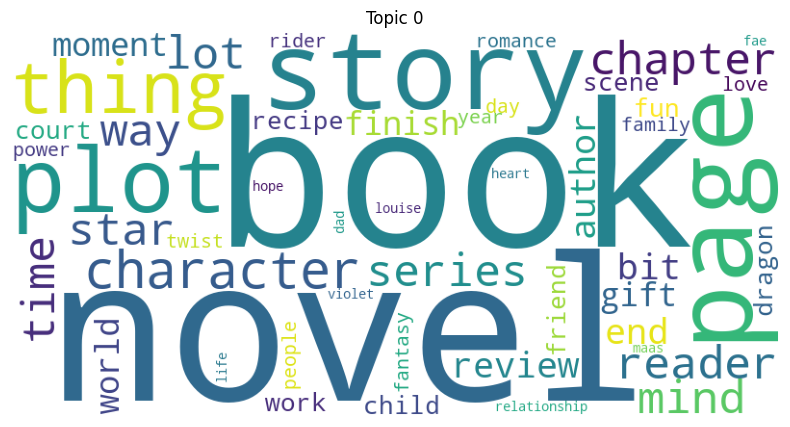

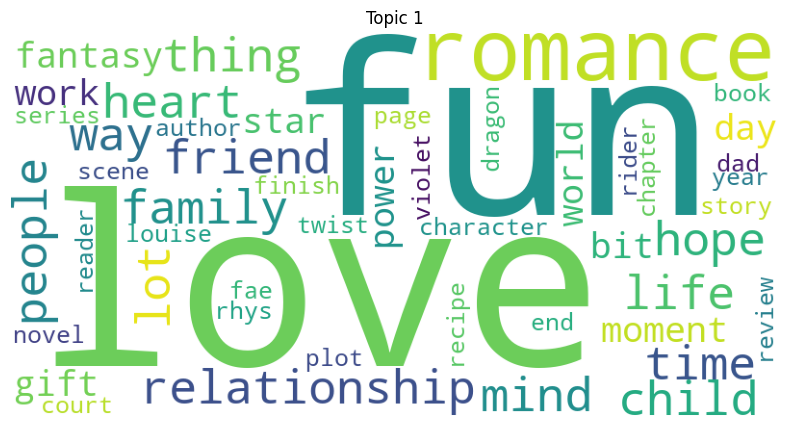

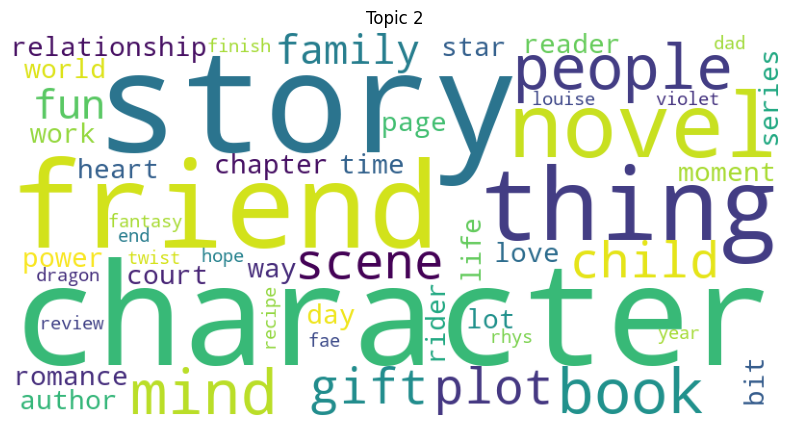

In [25]:
# print first 3 wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, words in enumerate(topic_words):
    if i == 3: #adjust this number to print more or less wordclouds
        break
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Topic {i}")
    plt.show()

In [26]:
# save the model
top2vec_model.save('top2vec_model')